#### Attemping a multivariate least squares fit

In [105]:
from gradient_descent_ols import Vector, num_friends_good, daily_minutes_good, add, scalar_multiply, plot_loss, ols
from typing import List, Tuple
import random

In [106]:
xs = num_friends_good
ys = daily_minutes_good

In [107]:
def dot(v1: Vector, v2: Vector) -> float:
    """Computes v1_1*v2_1 + v1_2*v2_2 ..."""
    assert len(v1)==len(v2)
    return sum(v1_i * v2_i for v1_i, v2_i in zip(v1,v2))

def vector_sum(vectors:List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # check that vector is not empty
    assert vectors, "no vectors provided!"
    # check that vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors) 
            for i in range(num_elements)]

In [108]:
assert dot([1, 2], [2, 0]) == 2

In [109]:
def add_intercept_vectors(xs: List[Vector]) -> List[Vector]:
    """add intercept 1 to xs vector"""
    return [[1] + x for x in xs]

def add_intercept(xs: Vector) -> List[Vector]:
    return [[1, x] for x in xs]


In [110]:
# predict the error per point
def predict_point(x: Vector, theta: Vector) -> float:
    return dot(x, theta)

def error_point(x: Vector, y: float, theta: Vector) -> float:
    """ Calculates the prediction error at point x"""
    return predict_point(x, theta) - y

assert error_point([1,3], 4, [1,1]) == 0

In [111]:
def sum_sq_error(xs: List[Vector], ys: Vector, theta) -> float:
    """Computer sum of square error for all xs, ys pairs """
    return sum(error_point(x, y, theta) ** 2 for x, y in zip(xs, ys))
    
def gradient(x: List[Vector], y: float, theta: Vector) -> List:
    """Calculates the gradient update for 1 point for theta """
    return scalar_multiply(error_point(x, y, theta), x)

def gradient_step(gradient: Vector, alpha: float) -> Vector:
    """ takes one gradient step"""
    return scalar_multiply(alpha, gradient)

def gradient_update(theta: Vector, gradient: Vector , alpha: float) -> Vector:
    return add(theta, gradient_step(gradient, -alpha))

In [112]:
assert sum_sq_error([[2,2]], [3], [1, 1]) == 1

theta = gradient_update([1, 1], [1, 1],  0.01)
assert 0.985 < theta[0] < 0.995 
assert 0.985 < theta[1] < 0.995 
theta

[0.99, 0.99]

In [113]:
def least_squares_fit(xs: List[float], ys: List[float] , alpha: float,  epochs: int = 20) -> Vector:
    """
    Find the theta that minimizes the sum of squared errors assuming the model y = dot(x, theta)
    """
    # start with a random guess for theta
    n = len(xs[0]) # number of features
    theta = [random.random() for _ in range(n)]
    m = len(xs) # number rows
    loss = [] 
    
    for epoch in range(epochs):
        #  error point * x_i for each point; then column wise sum with vector_sum for a 1 x n vector grad result
        grad = vector_sum([gradient(x, y, theta) for x, y in zip(xs, ys)]) 
        theta = gradient_update(theta, grad, alpha) # update theta 1 x n 
        epoch_loss = (1/ (2 * m)) * sum_sq_error(xs, ys, theta) # scalar for loss 
        loss.append((epoch, epoch_loss))
    plot_loss(loss)
    return theta

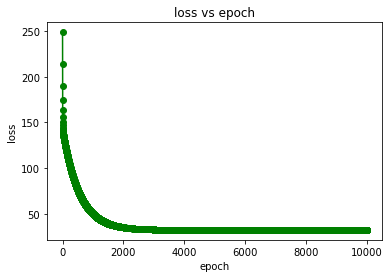

[22.945162119011258, 0.9040573579394636]

In [114]:
# i've had to look into results as previous rate was to high and nan results were generated. 
# decrease rate for a smoother loss curve
learning_rate = 0.00001
epochs = 10000
random.seed(0)

theta = least_squares_fit(add_intercept(num_friends_good), daily_minutes_good,  
                               learning_rate, epochs)


assert 22.93 < theta[0] < 22.96 
assert 0.9 < theta[1] < 0.91
theta

In [115]:
# for comparison only
ols(xs,ys)

(22.94755241346903, 0.9038659456058649)